<h1 align=center><font size=5>Sentiment Analysis of IMDB Movie Reviews</font></h1>

### Table of contents

- [Data](#data)
- [ANN](#ann)
- [CNN](#cnn)
- [LSTM](#lstm)
- [Bidirectional LSTM ](#bilstm)
- [CNN LSTM](#cnnlstm)

### Data <a id="data"></a>

#### About IMDB movie reviews

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

#### 1) Load IMDB dataset

&#x270d; 1.1) Load IMDB moview reviews dataset in keras with having the top 5,000 most common words.

In [1]:
from keras.datasets import imdb

vocab_size = 5000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocab_size)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


&#x270d; 1.2) Have a look at a sample of dataset. What are your observations?

In [2]:
X_train[1]

[1,
 194,
 1153,
 194,
 2,
 78,
 228,
 5,
 6,
 1463,
 4369,
 2,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 2,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 2,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 2,
 2,
 349,
 2637,
 148,
 605,
 2,
 2,
 15,
 123,
 125,
 68,
 2,
 2,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 2,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 2,
 131,
 152,
 491,
 18,
 2,
 32,
 2,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 285,
 16,
 145,
 95]

(array([8.500e+01, 9.070e+02, 1.151e+03, 1.347e+03, 3.731e+03, 3.347e+03,
        2.510e+03, 1.865e+03, 1.426e+03, 1.229e+03, 9.660e+02, 7.700e+02,
        7.270e+02, 6.090e+02, 5.670e+02, 4.210e+02, 3.920e+02, 3.340e+02,
        3.050e+02, 2.780e+02, 2.280e+02, 2.000e+02, 1.670e+02, 1.700e+02,
        1.460e+02, 1.230e+02, 1.050e+02, 1.030e+02, 9.200e+01, 7.300e+01,
        6.800e+01, 7.300e+01, 6.500e+01, 5.200e+01, 4.900e+01, 3.100e+01,
        4.400e+01, 3.200e+01, 4.500e+01, 5.800e+01, 6.500e+01, 1.500e+01,
        2.000e+00, 5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

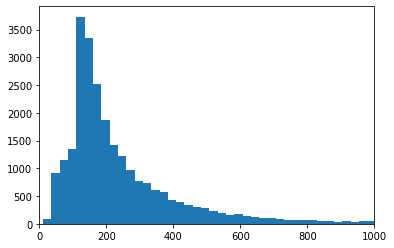

In [3]:
import matplotlib.pyplot as plt
plt.xlim(0,1000)
plt.hist(list(map(lambda x : len(x),X_train)),bins=100)

&#x270d; 1.3) Can you convert the integers back to words?

In [4]:
word_index = imdb.get_word_index() 

INDEX_FROM = 3
word_index = {key:(value+INDEX_FROM) for key,value in word_index.items()}
word_index["<PAD>"] = 0    # the padding token
word_index["<START>"] = 1  # the starting token
word_index["<UNK>"] = 2    # the unknown token

reverse_word_index = {value:key for key, value in word_index.items()} 

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(X_train[0])

1646592/1641221 [==============================] - 0s 0us/step


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what the

#### Truncate and pad the data.

&#x270d; 1.4) Truncate and pad the review sequences with maximum length of all review sequences to be 500.

In [5]:
from keras.preprocessing.sequence import pad_sequences

max_length = 500 

X_train = pad_sequences(X_train, max_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, max_length, padding='post', truncating='post')

print('X_train shape:', X_train.shape) # (n_samples, sequence_length)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 500)
X_test shape: (25000, 500)


&#x270d; 1.5) Have a look at a sample of dataset.

In [6]:
X_train[1]

array([   1,  194, 1153,  194,    2,   78,  228,    5,    6, 1463, 4369,
          2,  134,   26,    4,  715,    8,  118, 1634,   14,  394,   20,
         13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,   14,
         69,  188,    8,   30,   23,    7,    4,  249,  126,   93,    4,
        114,    9, 2300, 1523,    5,  647,    4,  116,    9,   35,    2,
          4,  229,    9,  340, 1322,    4,  118,    9,    4,  130, 4901,
         19,    4, 1002,    5,   89,   29,  952,   46,   37,    4,  455,
          9,   45,   43,   38, 1543, 1905,  398,    4, 1649,   26,    2,
          5,  163,   11, 3215,    2,    4, 1153,    9,  194,  775,    7,
          2,    2,  349, 2637,  148,  605,    2,    2,   15,  123,  125,
         68,    2,    2,   15,  349,  165, 4362,   98,    5,    4,  228,
          9,   43,    2, 1157,   15,  299,  120,    5,  120,  174,   11,
        220,  175,  136,   50,    9, 4373,  228,    2,    5,    2,  656,
        245, 2350,    5,    4,    2,  131,  152,  4

In [7]:
y_train[1]

0

###  2) ANN model <a id="ann"></a>
What Are Word Embeddings? 

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

https://keras.io/layers/embeddings/

&#x270d; 2.1) Create the model.

&#x270d; 2.2) Compile and train the model. Consider 10% of training set for validation purpose.

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
embedding_dim = 16
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim,input_length= max_length,mask_zero=True))
model.add(Flatten())
#model.add(GlobalAveragePooling1D()) # averages across the vector to flatten it out.
model.add(Dense(units= 16, activation= 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           80000     
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                128016    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 208,033
Trainable params: 208,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 [==============================] - 6s 7ms/step - loss: 0.6092 - accuracy: 0.6040 - val_loss: 0.3234 - val_accuracy: 0.8624
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 0.2162 - accuracy: 0.9165 - val_

&#x270d; 2.3) Evaluate the model over test set.

In [9]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.8481
Test score: 0.8308444619178772
Test accuracy: 0.8480799794197083


&#x270d; 2.4) Plot loss and accuracy metrics versus training epochs for both training and validation sets.

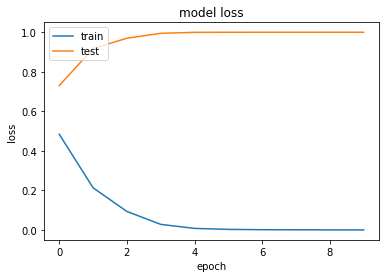

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['accuracy'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
    
    
plot_model(history)

###  3) CNN model <a id="cnn"></a>

In [13]:
from keras.models import Sequential
from tensorflow.keras import regularizers
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 16

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
#model.add(Dropout(0.2))

model.add(Conv1D(filters = 128, kernel_size = 5, strides= 1, padding='same', activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
#[None,time_stamp=500, variable=embedding_dim]
model.add(GlobalMaxPooling1D())


model.add(Dense(units= 64, activation= 'relu',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 98,689
Trainable params: 98,689
Non-trainable params: 0
__________________________________________________

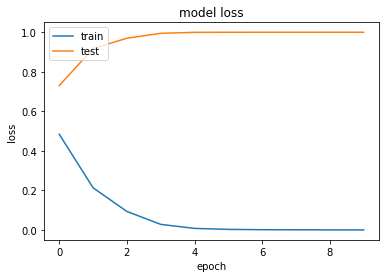

In [15]:
plot_model(history)

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 3

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_data=(X_test, y_test))  

Epoch 1/3
782/782 [==============================] - 41s 52ms/step - loss: 0.6979 - accuracy: 0.6090 - val_loss: 0.4264 - val_accuracy: 0.8305
Epoch 2/3
782/782 [==============================] - 40s 52ms/step - loss: 0.3846 - accuracy: 0.8583 - val_loss: 0.3524 - val_accuracy: 0.8721
Epoch 3/3
782/782 [==============================] - 40s 52ms/step - loss: 0.2942 - accuracy: 0.9046 - val_loss: 0.3412 - val_accuracy: 0.8785


In [19]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 9s 11ms/step - loss: 0.3412 - accuracy: 0.8785
Test score: 0.34119656682014465
Test accuracy: 0.8784800171852112


In [20]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape) # (vocab_size, embedding_dim)
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')
for word_num in range(4, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()


(5000, 16)


###  4) LSTM model <a id="lstm"></a>

In [21]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length, mask_zero=True))
model.add(LSTM(max_length, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm (LSTM)                  (None, 500)               1034000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 501       
Total params: 1,114,501
Trainable params: 1,114,501
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size,64,input_length=max_length,mask_zero=True))
model.add(LSTM(32))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 64)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 332,961
Trainable params: 332,961
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size= 512,
          epochs= 5,
          validation_split= 0.1)  

Epoch 1/5
44/44 [==============================] - 67s 1s/step - loss: 0.6854 - accuracy: 0.5765 - val_loss: 0.5047 - val_accuracy: 0.8080
Epoch 2/5
44/44 [==============================] - 62s 1s/step - loss: 0.4383 - accuracy: 0.8239 - val_loss: 0.3426 - val_accuracy: 0.8608
Epoch 3/5
44/44 [==============================] - 62s 1s/step - loss: 0.2809 - accuracy: 0.8928 - val_loss: 0.3060 - val_accuracy: 0.8856
Epoch 4/5
44/44 [==============================] - 62s 1s/step - loss: 0.2229 - accuracy: 0.9206 - val_loss: 0.2974 - val_accuracy: 0.8820
Epoch 5/5
44/44 [==============================] - 62s 1s/step - loss: 0.1873 - accuracy: 0.9368 - val_loss: 0.3373 - val_accuracy: 0.8764


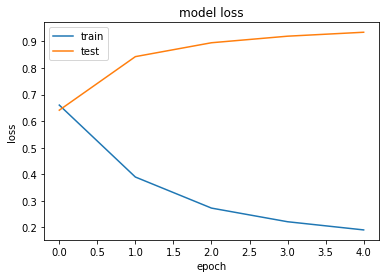

In [24]:
plot_model(history)

In [25]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 41s 53ms/step - loss: 0.3409 - accuracy: 0.8690
Test score: 0.3409314453601837
Test accuracy: 0.8689600229263306


### 5) Bidirectional LSTM model <a name="bilstm"></a>

In [29]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 121,601
Trainable params: 121,601
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 32
epochs = 5

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_split= 0.1)

Epoch 1/5
704/704 [==============================] - 307s 432ms/step - loss: 0.6216 - accuracy: 0.6294 - val_loss: 0.5180 - val_accuracy: 0.7380
Epoch 2/5
704/704 [==============================] - 304s 432ms/step - loss: 0.4237 - accuracy: 0.8256 - val_loss: 0.6632 - val_accuracy: 0.5748
Epoch 3/5
704/704 [==============================] - 304s 432ms/step - loss: 0.4565 - accuracy: 0.7878 - val_loss: 0.3363 - val_accuracy: 0.8612
Epoch 4/5
704/704 [==============================] - 303s 431ms/step - loss: 0.2903 - accuracy: 0.8909 - val_loss: 0.3559 - val_accuracy: 0.8800
Epoch 5/5
704/704 [==============================] - 302s 430ms/step - loss: 0.3822 - accuracy: 0.8336 - val_loss: 0.6834 - val_accuracy: 0.7804


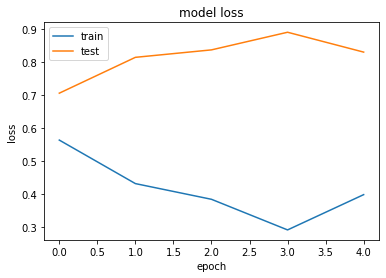

In [31]:
plot_model(history)

In [32]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 62s 79ms/step - loss: 0.6570 - accuracy: 0.7905
Test score: 0.6569909453392029
Test accuracy: 0.7904800176620483


### 6) CNN LSTM model <a name="cnnlstm"></a>

In [33]:
from keras.layers import MaxPooling1D, Activation
embedding_dim=16
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length,mask_zero=True))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 64, kernel_size= 5, activation='relu', strides=1))
model.add(MaxPooling1D(pool_size= 4))
model.add(LSTM(70))
model.add(Dense(1,activation='sigmoid'))
#model.add(Activation('sigmoid'))


model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           5184      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 124, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 71        
Total params: 123,055
Trainable params: 123,055
Non-trainable params: 0
________________________________________________

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 250
epochs = 5

history = model.fit(X_train, y_train,
          batch_size= batch_size,
          epochs= epochs,
          validation_data=(X_test, y_test))

Epoch 1/5
100/100 [==============================] - 66s 641ms/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6926 - val_accuracy: 0.5067
Epoch 2/5
100/100 [==============================] - 64s 640ms/step - loss: 0.6910 - accuracy: 0.5178 - val_loss: 0.6918 - val_accuracy: 0.5028
Epoch 3/5
100/100 [==============================] - 64s 640ms/step - loss: 0.6884 - accuracy: 0.5367 - val_loss: 0.6923 - val_accuracy: 0.5112
Epoch 4/5
100/100 [==============================] - 64s 640ms/step - loss: 0.6895 - accuracy: 0.5189 - val_loss: 0.6965 - val_accuracy: 0.5036
Epoch 5/5
100/100 [==============================] - 64s 640ms/step - loss: 0.6867 - accuracy: 0.5139 - val_loss: 0.5834 - val_accuracy: 0.7544


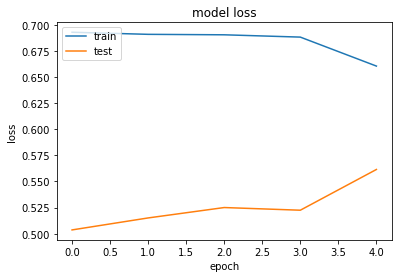

In [35]:
plot_model(history)

In [36]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

782/782 [==============================] - 20s 25ms/step - loss: 0.5834 - accuracy: 0.7544
Test score: 0.5834141969680786
Test accuracy: 0.754360020160675


### Reference <a name="ref"></a>

https://keras.io/examples/imdb_cnn/